In [12]:
#load all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests

In [13]:
# set random seed for repoducibility
np.random.seed(103)
obesity= pd.read_csv('/Users/rohitmalhotra/Desktop/ObesityDataSet_raw_and_data_sinthetic.csv')


In [14]:
#To ensure the order of the Categories of Obesity are easy to interpret
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]


In [15]:
#ensure that order is followed

obesity['NObeyesdad'] = pd.Categorical(
    obesity['NObeyesdad'],
    categories=order,
    ordered=True
)


In [16]:
# review the obesity categories
obesity['NObeyesdad'].cat.categories


Index(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
       'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III'],
      dtype='object')

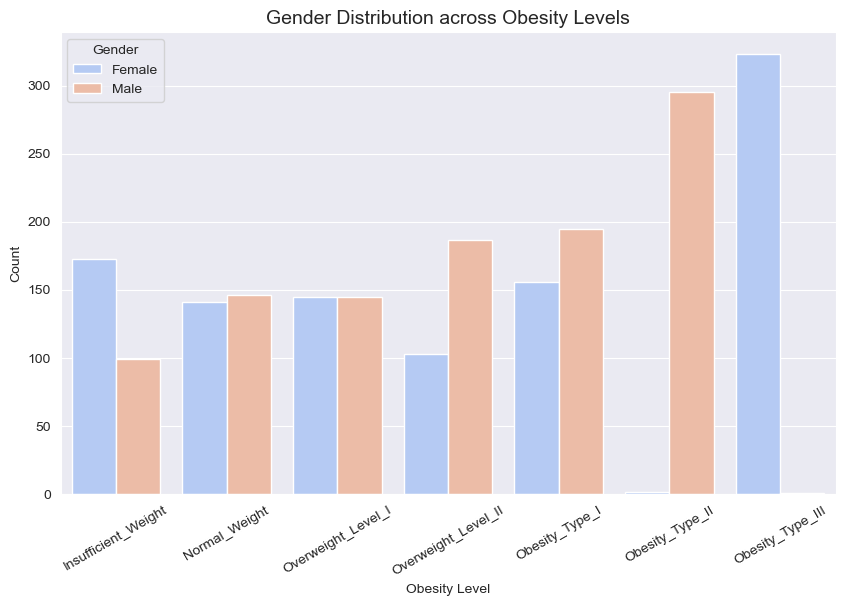

In [17]:
# Experiment 1 : Gender Distribution across Obesity Levels

#Purpose: To analyze whether obesity levels differ significantly by gender, identifying potential demographic trends.
#Method:Seaborn countplot showing the frequency of male and female participants across obesity categories (x=NObeyesdad, hue=Gender).
# Result: The plot shows visible differences in gender distribution across obesity levels. 
# In normal weight and overweight_level_I both males and females are quite similar.
# Oerweight level I and Obesity level I was dominated by Males.
# Obesity type II was only males and Obesity type III was only females.
# Takeaway: Gender may act as an influential demographic factor for predicting obesity levels. 
# It could be included as a categorical feature in modeling, 
# but its predictive power should be validated through correlation or feature importance analysis.

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

sns.countplot(
    data=obesity,
    x='NObeyesdad',
    hue='Gender',
    order=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ],
    palette='coolwarm'
)

plt.title('Gender Distribution across Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.show()

In [18]:
#experiement2
# # Calculate gender percentage within each obesity level

# First Calculate gender counts
gender_percentages = (
    obesity.groupby(['NObeyesdad', 'Gender'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Calculate percentages 
gender_percentages['Percentage'] = (
    gender_percentages['Count'] / 
    gender_percentages.groupby('NObeyesdad', observed=True)['Count'].transform('sum') * 100
)

gender_percentages


NObeyesdad  Gender  Count  Percentage
0   Insufficient_Weight  Female    173   63.602941
1   Insufficient_Weight    Male     99   36.397059
2         Normal_Weight  Female    141   49.128920
3         Normal_Weight    Male    146   50.871080
4    Overweight_Level_I  Female    145   50.000000
5    Overweight_Level_I    Male    145   50.000000
6   Overweight_Level_II  Female    103   35.517241
7   Overweight_Level_II    Male    187   64.482759
8        Obesity_Type_I  Female    156   44.444444
9        Obesity_Type_I    Male    195   55.555556
10      Obesity_Type_II  Female      2    0.673401
11      Obesity_Type_II    Male    295   99.326599
12     Obesity_Type_III  Female    323   99.691358
13     Obesity_Type_III    Male      1    0.308642

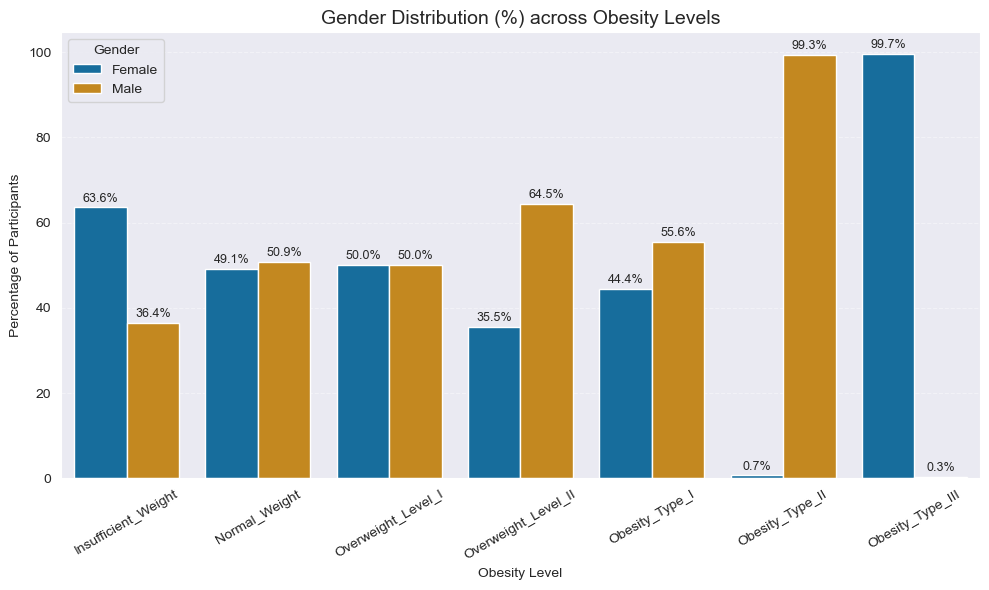

In [19]:
#experiment 3
#look at gender distribution with percentage levels labelled
#maintain order so the data is easily understood
#use accessible color palette
#continue to maintain order of obseity levels

order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=gender_percentages,
    x='NObeyesdad',
    y='Percentage',
    hue='Gender',
    order=order,
    palette='colorblind'
)

# Add percentage labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.title('Gender Distribution (%) across Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Percentage of Participants')
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


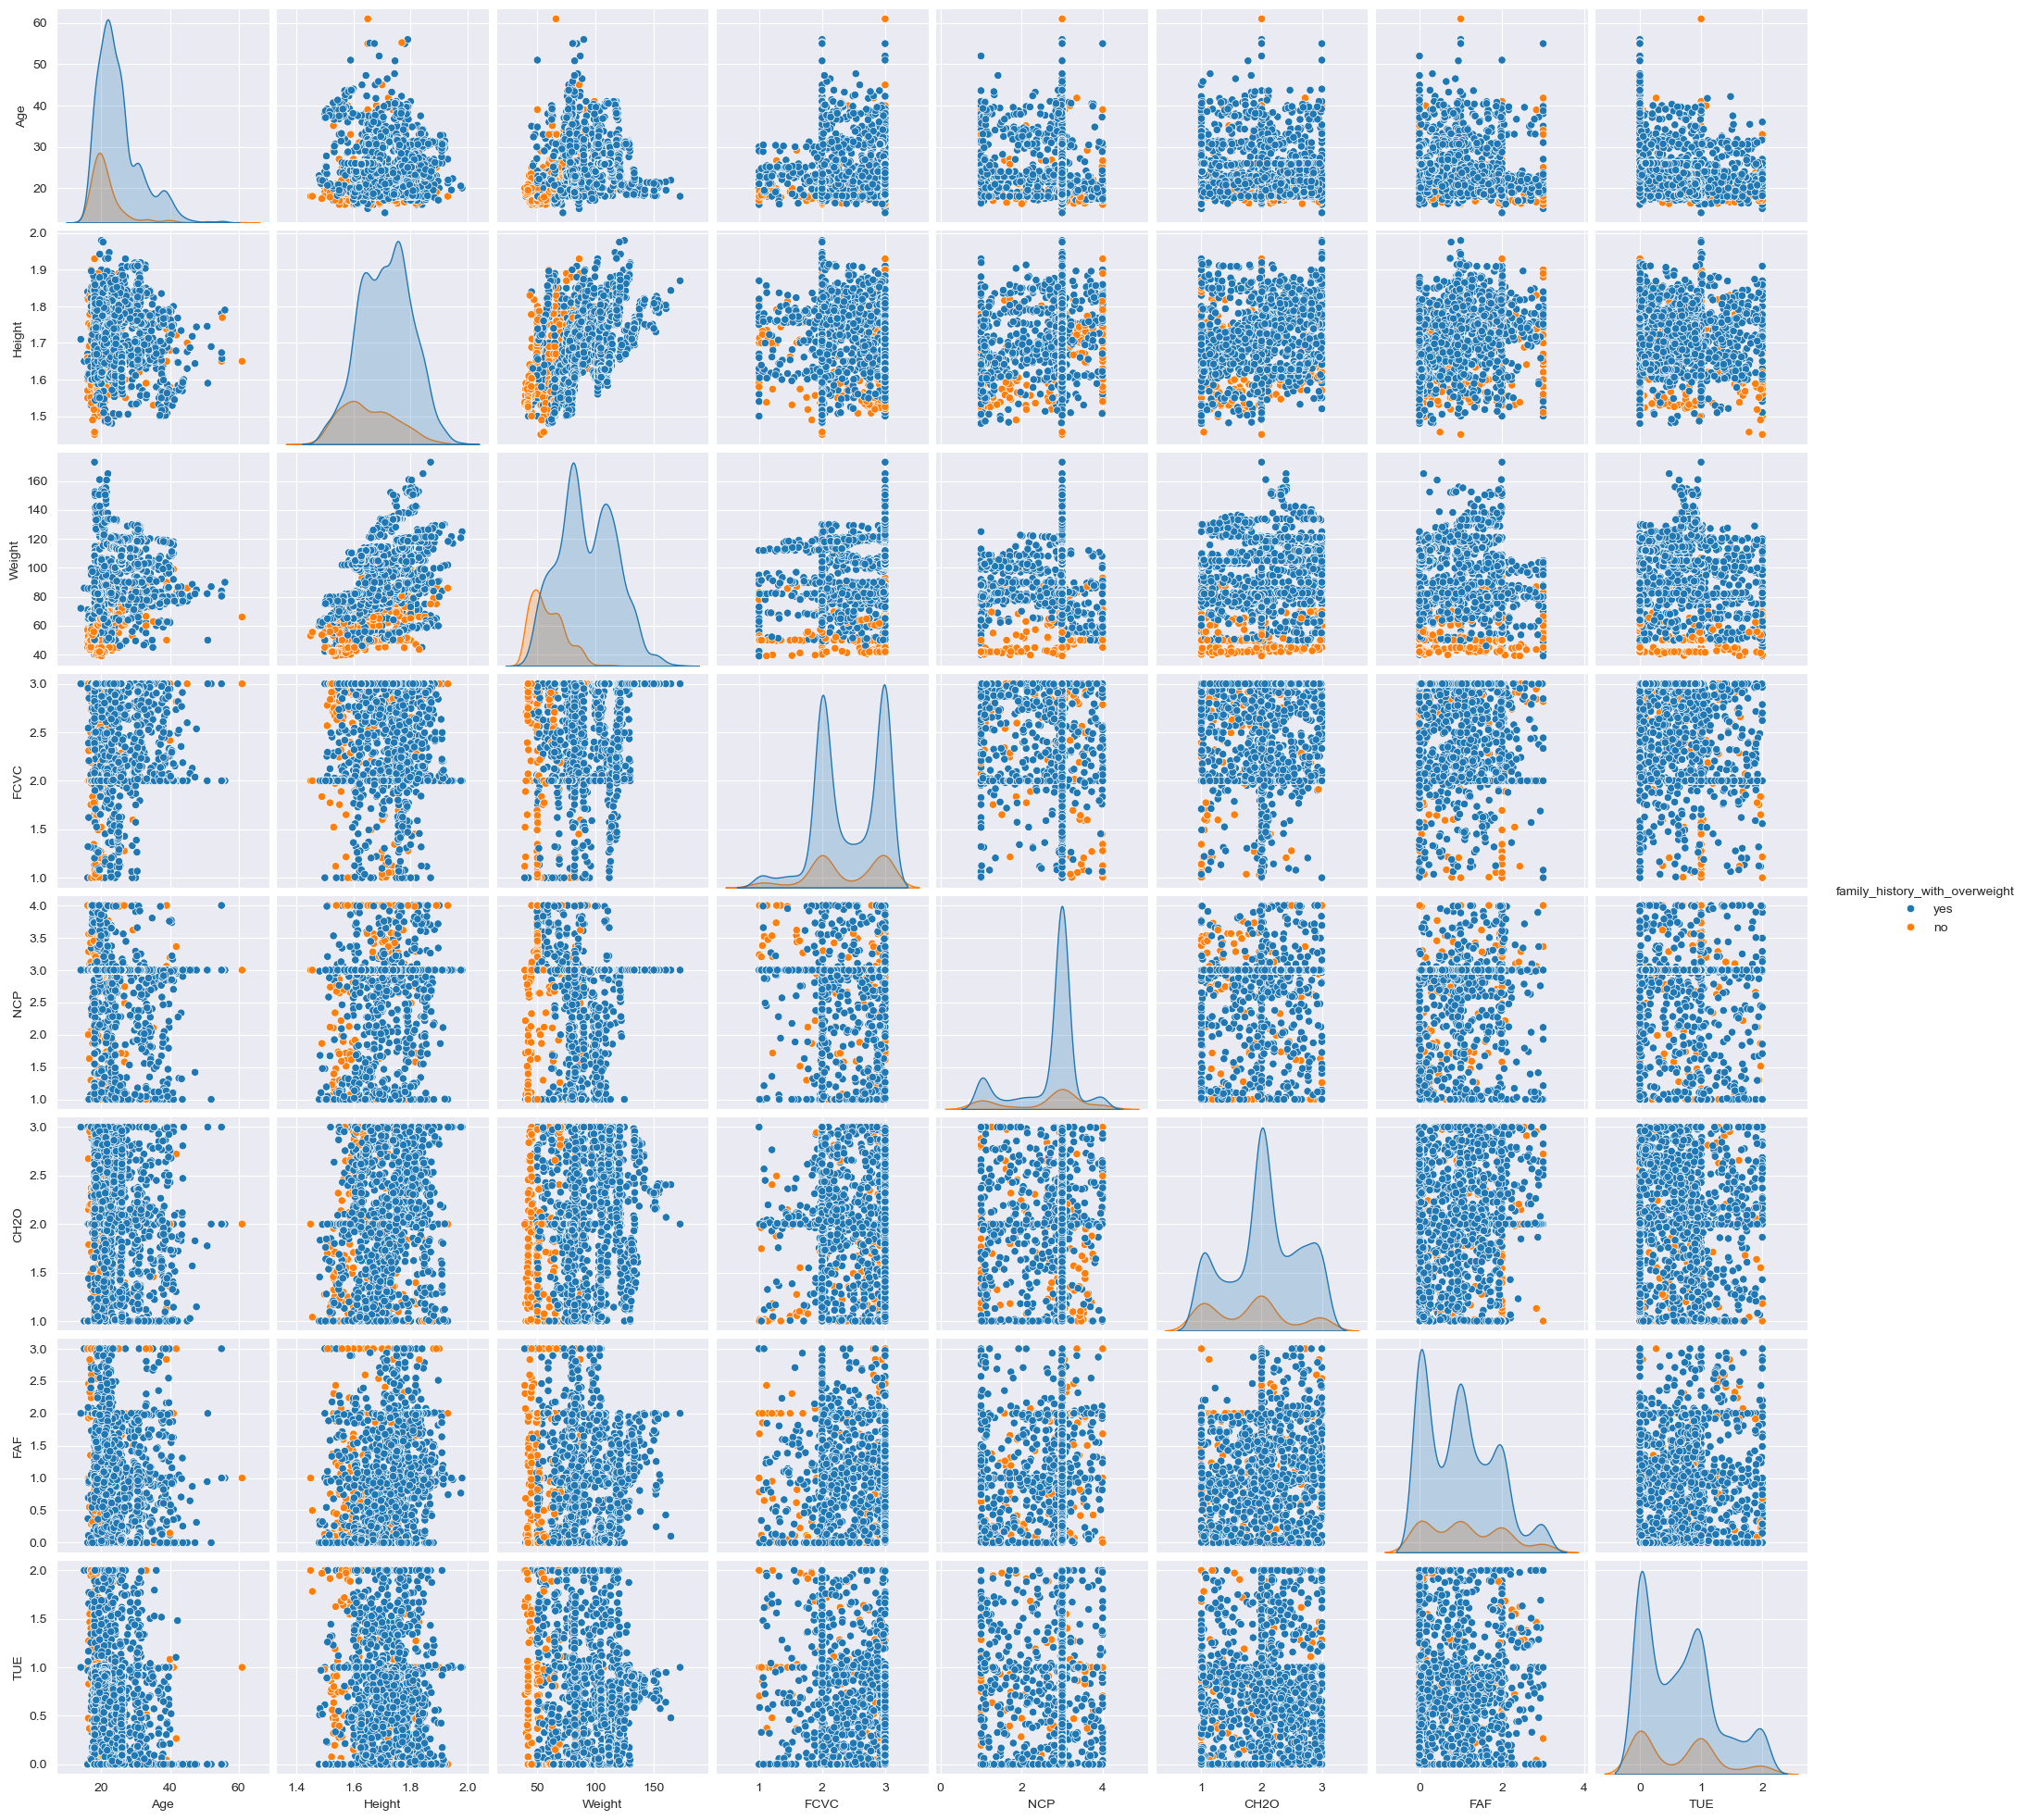

In [20]:
#Experiment 4: Family history influence on physical and eating habit features.
# Using hue='family_history_with_overweight', I compared weight, height, FCVC, and NCP distributions.
# Individuals with a family history of overweight show a higher mean weight and lower FCVC on average, 
# suggesting hereditary and behavioral correlation.

sns.pairplot(
            data=obesity,
            hue='family_history_with_overweight'
)

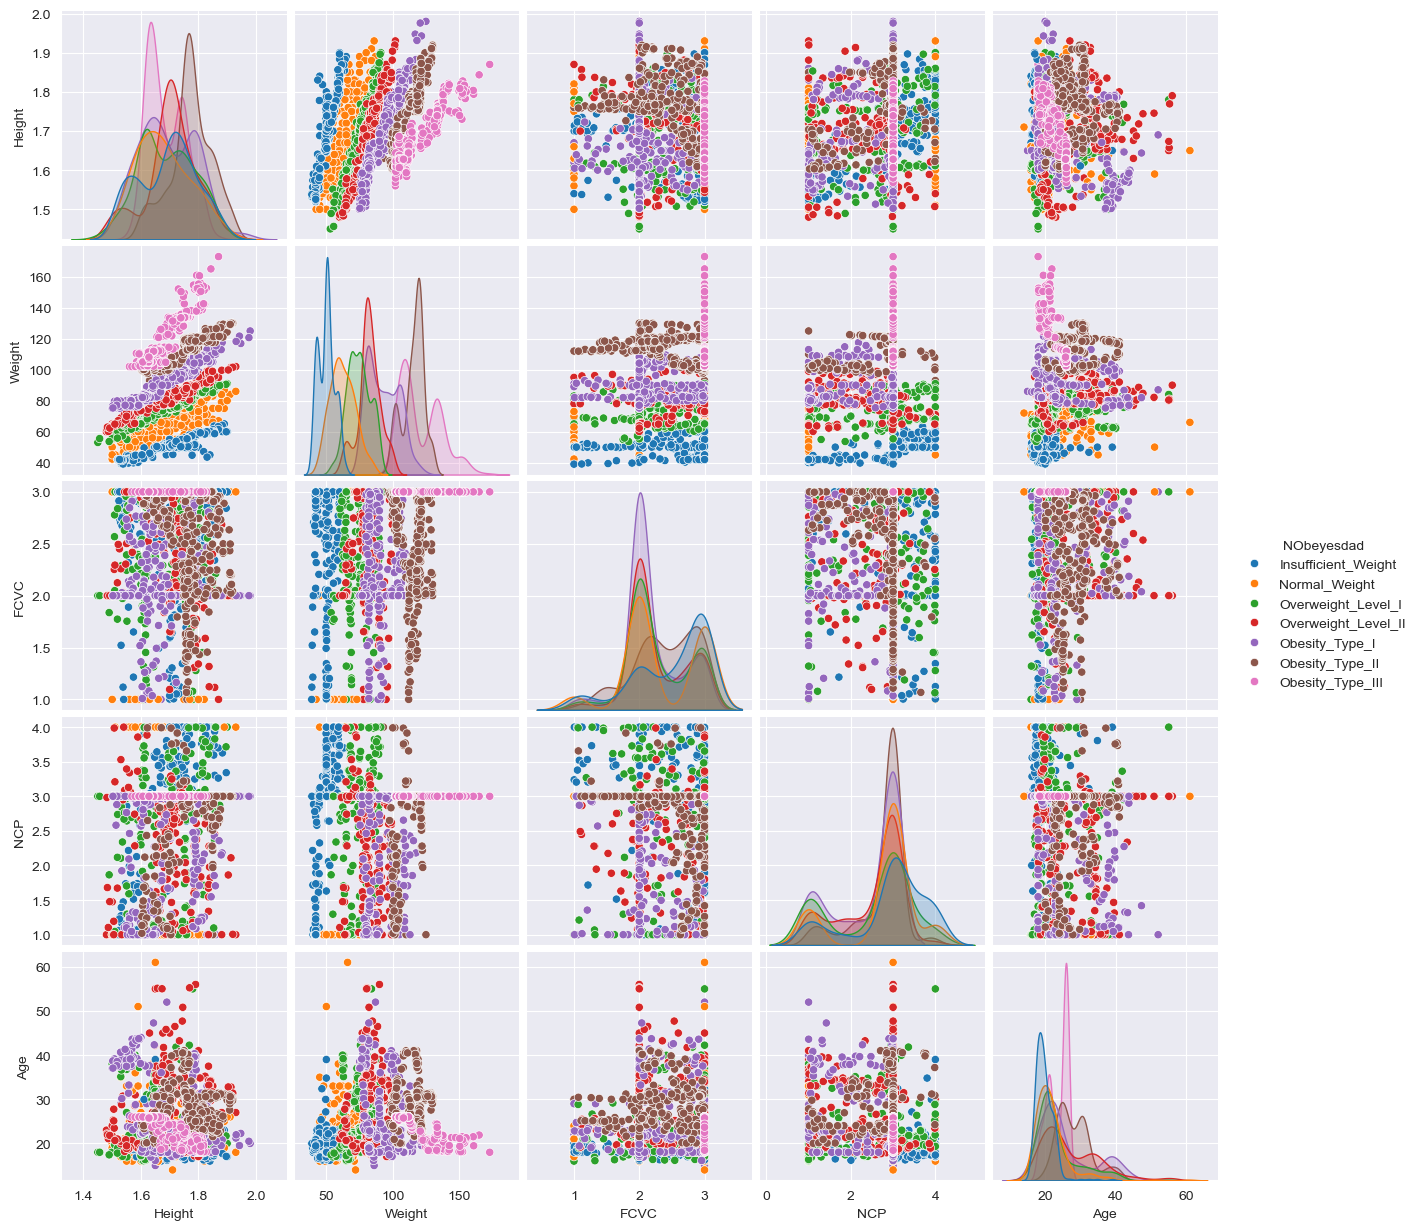

In [21]:
#Experiment5: Pairwise relationships between physical and dietary features by obesity level.
# I generated a pairplot (hue='NObeyesdad') using Height, Weight, Age, FCVC, and NCP.
# The visualization showed that higher weight at similar height corresponds with obesity categories, 
# while higher FCVC (vegetable consumption) aligns with normal weight.

sns.pairplot(data=obesity, 
             vars=['Height','Weight','FCVC','NCP','Age'], 
             hue='NObeyesdad', 
             diag_kind='kde',
             )

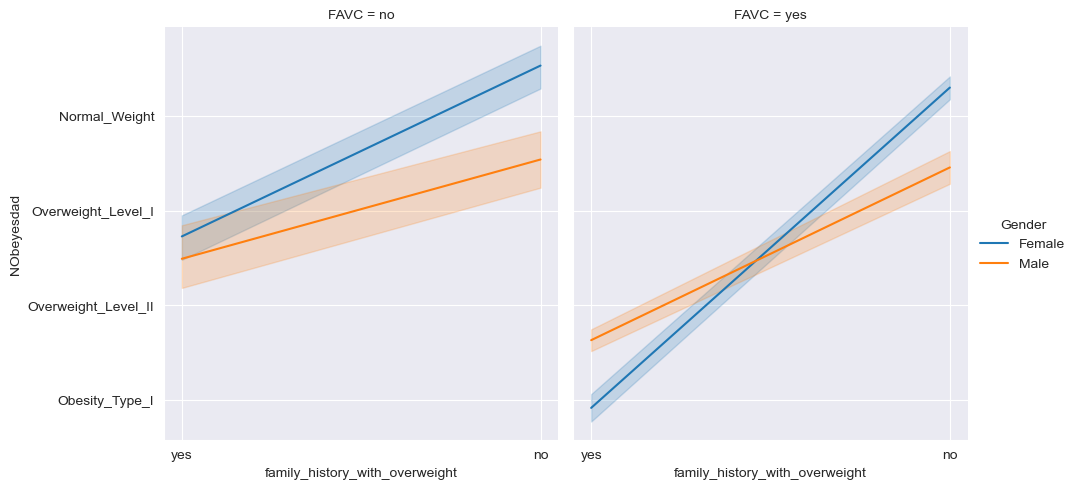

In [22]:
#Experiment 6: Relationship between Weight and Family history with overweight by Obesity Level, 'do you eat high calorie food frequently' - FAVC
# tried using the relplot
daysplot = sns.relplot(
    data=obesity,
    x="family_history_with_overweight",
    y="NObeyesdad",
    hue="Gender",
    col="FAVC",
    kind="line",
    col_wrap=2
)

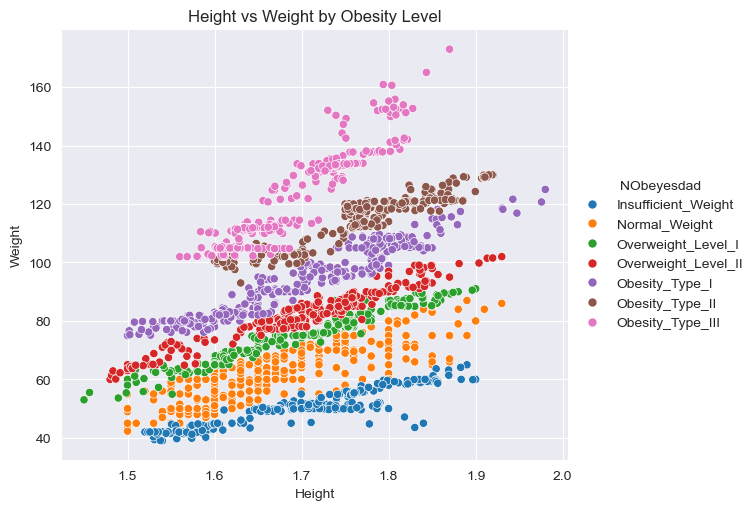

In [23]:
#Experiment 7: Relationship between Height and Weight by Obesity Level
#Goal: Examine physical patterns across obesity levels.
#Method: Seaborn relplot with hue = NObeyesdad.
#Result: Clear separation of obesity levels; higher weights correspond to more severe obesity classes.
#Takeaway: Weight and height are primary indicators — BMI feature confirmed as relevant.

sns.relplot(
    data=obesity,
    x='Height',
    y='Weight',
    hue='NObeyesdad',    # color by obesity category
    kind='scatter',
    height=5,
    aspect=1.2
)
plt.title("Height vs Weight by Obesity Level")
plt.show()


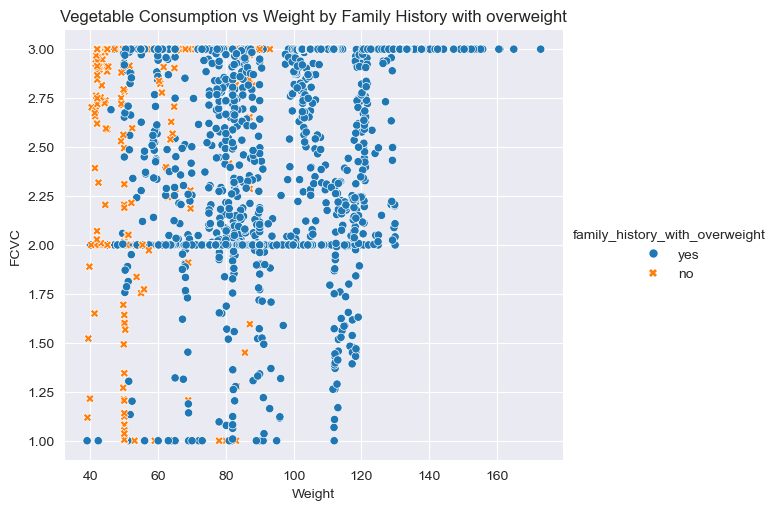

In [24]:
# Experiment 8-Vegetable Consumption vs Weight by Family History
# Goal: Vegetable consumpation,weight patterns across indivduals with or without overweight as family history .
#Method: Seaborn relplot with hue = 'family_history_with_overweight'
#Result: Clear separation of obesity levels; higher weights correspond to more severe obesity classes.
#Takeaway: Higher Weight and family history with overweight have direct correlation, vegetable consumption and family history with overweight is not a very clear relation

sns.relplot(
    data=obesity,
    x='Weight',
    y='FCVC',   # frequency of vegetable consumption
    hue='family_history_with_overweight',
    style='family_history_with_overweight',  # shape by family history
    kind='scatter',
    height=5,
    aspect=1.2
)
plt.title("Vegetable Consumption vs Weight by Family History with overweight")
plt.show()


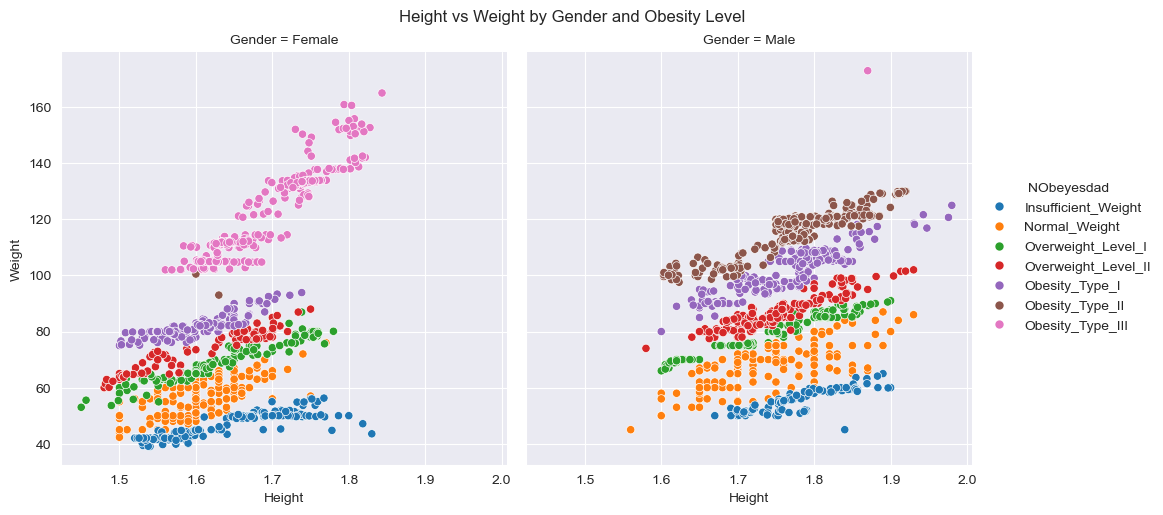

In [25]:

# Experiment 9-Height vs Weight by Gender and Obesity Level
# Goal: Height,weight patterns across obesity levels as per gender
#Method: Seaborn relplot 
#Result: Data seems skewed for Obesity type III being mostly females, and Obesity type II being mostly males
#Takeaway: Increase in weight again appearing as direclty impacting obesity levels across both genders, height not as much 

sns.relplot(
    data=obesity,
    x='Height',
    y='Weight',
    hue='NObeyesdad',
    col='Gender',          # separate plots by gender
    kind='scatter',
    height=5,
    aspect=1
)
plt.suptitle("Height vs Weight by Gender and Obesity Level", y=1.02)
plt.show()


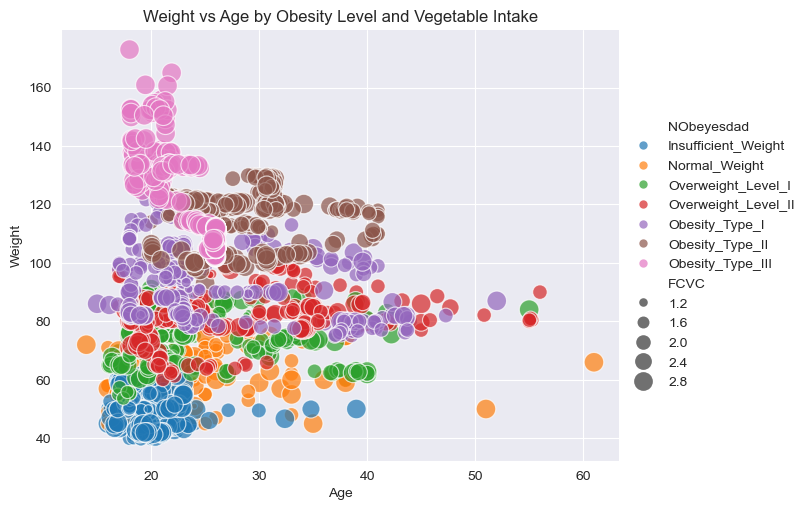

In [26]:

# Experiment 10-Weight vs age by obesity level and as per vegatable intake
# Goal: Weight,age patterns across obesity levels as per vegetable intake
# Method: Seaborn relplot 
#Result: Data seems skewed for younger individuals- showing higher obesity type iii prevalent with high weight
#Takeaway: Vegetable consumption freqeuncy not a clear indicator, Obesity type iii prevalent higher in the younger age group

sns.relplot(
    data=obesity,
    x='Age',
    y='Weight',
    hue='NObeyesdad',
    size='FCVC',  # marker size reflects vegetable consumption frequency
    sizes=(20, 200),
    alpha=0.7,
    kind='scatter',
    height=5,
    aspect=1.3
)
plt.title("Weight vs Age by Obesity Level and Vegetable Intake")
plt.show()


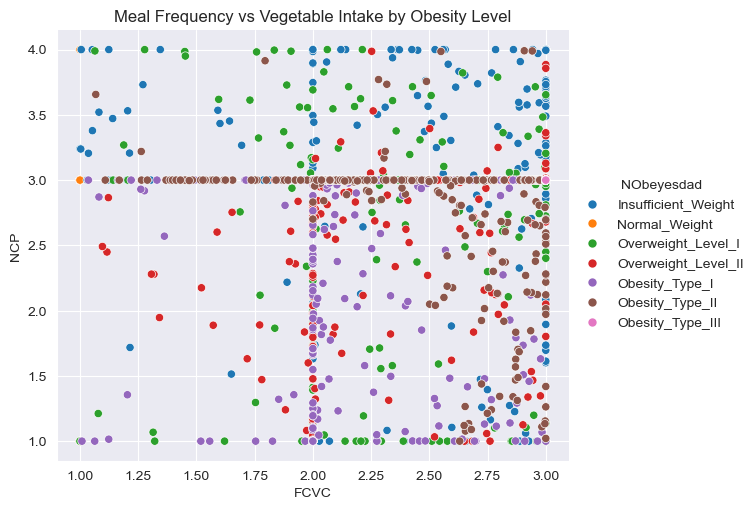

In [27]:
# Experiment 11-Meal frequency Vs Vegetable intake by obesity level
# Goal: Identify  vegetable intake FCVC and meal frequency NCP frequency patterns across obesity levels
# Method: Seaborn relplot with obesity levels 'NObeyesdad' as hue
#Result: Not enough data for obesity type iii and normal weight, the two extreme ends of teh obesity levels
#Takeaway: No clear correlation

sns.relplot(
    data=obesity,
    x='FCVC',  # vegetable frequency
    y='NCP',   # number of meals
    hue='NObeyesdad',
    kind='scatter',
    height=5,
    aspect=1.2,
    
)
plt.title("Meal Frequency vs Vegetable Intake by Obesity Level")
plt.show()


In [28]:
#Compute BMI
# Assuming 'Height' is in meters and 'Weight' is in kilograms

obesity['BMI'] = obesity['Weight'] / (obesity['Height'] ** 2)


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/346393061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


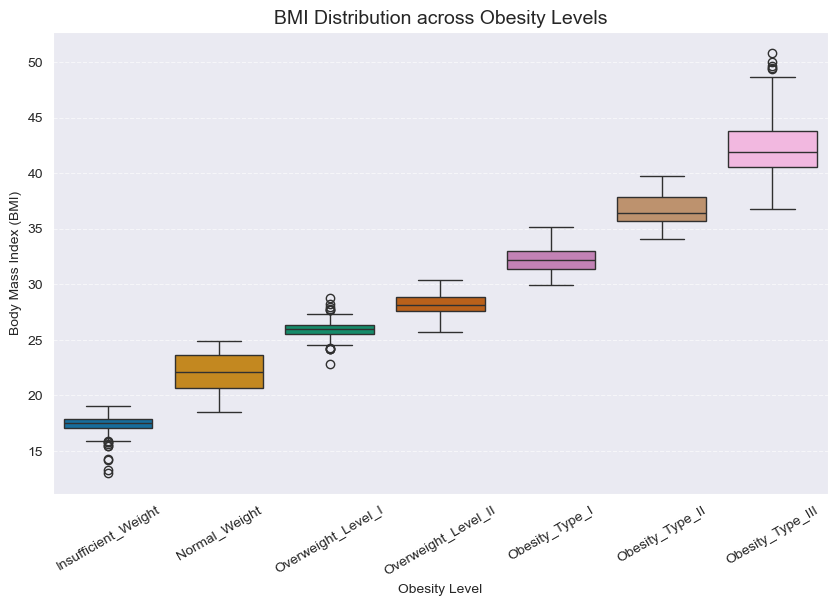

In [ ]:

# Experiment 12-BMI distribution across obesity levels
# Goal: Identify  BMI patterns across obesity levels
# Method: Seaborn boxplot 
# Result: BMI is higher for overweight type I and II, obesity type I, II and III
# Takeaway: Higher BMI correlates to top three obesity levels - Obesity I , II and III

plt.figure(figsize=(10,6))
sns.boxplot(
    data=obesity,
    x='NObeyesdad',
    y='BMI',
    palette='colorblind', #accessible palette
    order=order
)

plt.title('BMI Distribution across Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Body Mass Index (BMI)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/4109631216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


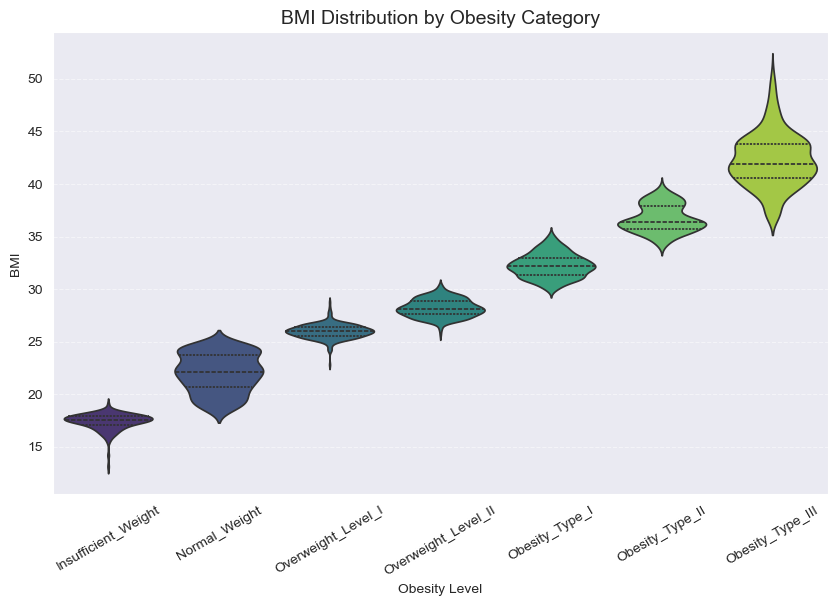

In [ ]:

# Experiment 13-BMI distribution across obesity levels
# Goal: Identify  BMI patterns across obesity levels
# Method: Viloin plot(shows full density)
# Result: BMI is higher for overweight type I and II, obesity type I, II and III
# Takeaway: Higher BMI correlates to top three obesity levels - Obesity I , II and III

plt.figure(figsize=(10,6))
sns.violinplot(
    data=obesity,
    x='NObeyesdad',
    y='BMI',
    inner='quartile',
    palette='viridis', #accessible pallette
    order=order
)

plt.title('BMI Distribution by Obesity Category', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/3917648162.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


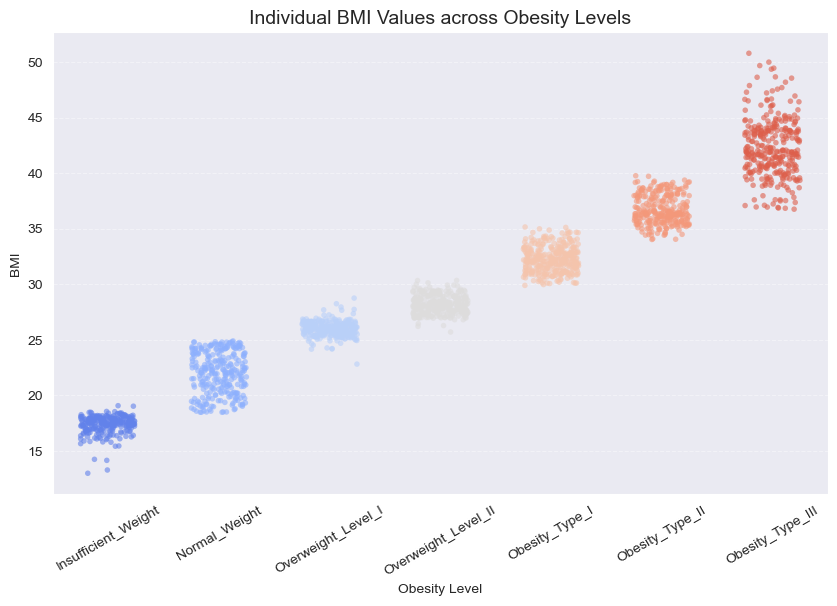

In [ ]:
# Experiment 14-individual BMI value distribution across obesity levels
# Goal: Identify individual BMI value patterns across obesity levels
# Method: Stripplot
# Result: BMI is higher for overweight type I and II, obesity type I, II and III
# Takeaway: Higher BMI correlates to top three obesity levels - Obesity I , II and III

# Define the correct order
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]


# Plot with the order parameter
plt.figure(figsize=(10,6))
sns.stripplot(
    data=obesity,
    x='NObeyesdad',
    y='BMI',
    order=order,          # this enforces my custom order
    jitter=0.25,
    size=4,
    alpha=0.6,
    palette='coolwarm'
)

plt.title('Individual BMI Values across Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/2354160905.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


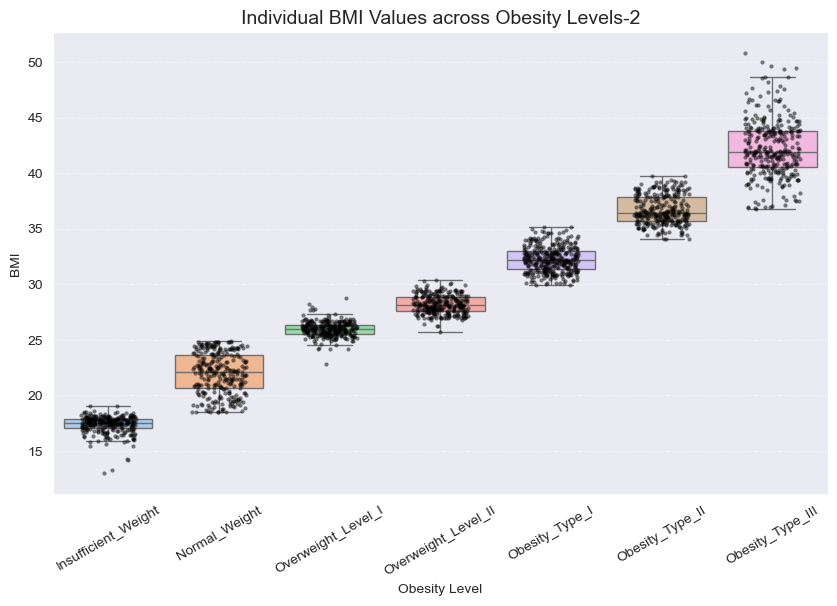

In [34]:
# Experiment 15-individual BMI value distribution across obesity levels
# Goal: view the individual BMI value patterns across obesity levels, by combining two visualizations
# Method: Boxplot and stripplot together
# Result: BMI is higher for overweight type I and II, obesity type I, II and III
# Takeaway: Higher BMI correlates to top three obesity levels - Obesity I , II and III

plt.figure(figsize=(10,6))

sns.boxplot(
    data=obesity,
    x='NObeyesdad',
    y='BMI',
    showfliers=False,
    palette='pastel',
    order=order
)
sns.stripplot(
    data=obesity,
    x='NObeyesdad',
    y='BMI',
    jitter=0.25,
    size=3,
    color='black',
    alpha=0.5,
    order=order
)
plt.title('Individual BMI Values across Obesity Levels-2', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/1082851156.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bmi = obesity.groupby('NObeyesdad')['BMI'].mean().reset_index()
/var/folders/1b/ckycmjyj5kj02vv18blgszkc0000gn/T/ipykernel_9779/1082851156.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=obesity, x='NObeyesdad', y='BMI', palette='colorblind',order=order) #accessible palette


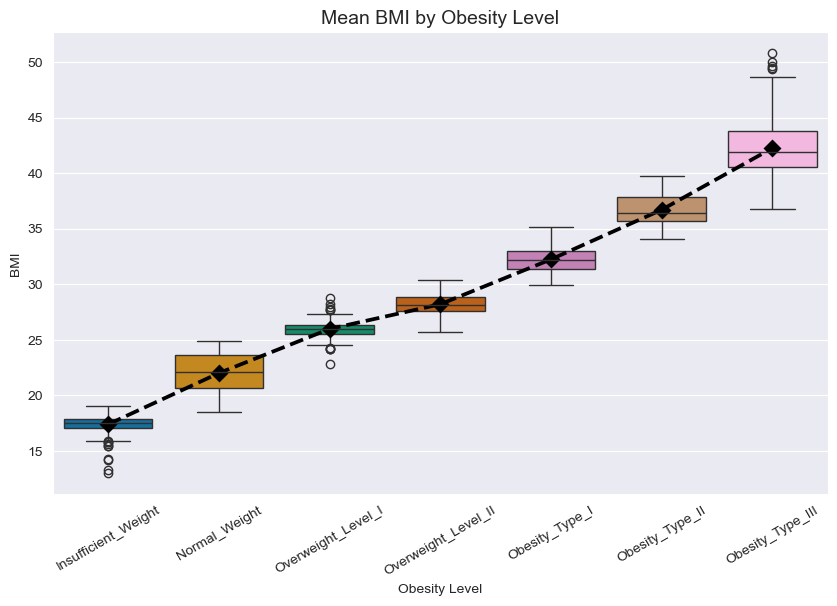

In [35]:
# Experiment 16-BMI median value distribution across obesity levels
# Goal: view the individual BMI median value patterns across obesity levels
# Method: Boxplot and pointplot together
# Result: BMI median increases for overweight type I and II, obesity type I, II and III
# Takeaway: Higher BMI median correlates to top three obesity levels - Obesity I , II and III

#calculate BMI median
mean_bmi = obesity.groupby('NObeyesdad')['BMI'].mean().reset_index()


plt.figure(figsize=(10,6))
sns.boxplot(data=obesity, x='NObeyesdad', y='BMI', palette='colorblind',order=order) #accessible palette
sns.pointplot(data=mean_bmi, x='NObeyesdad', y='BMI', color='black', markers='D', linestyles='--',order=order)
plt.title('Mean BMI by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('BMI')
plt.xticks(rotation=30)
plt.show()
